In [1]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [2]:
secretnumber = '0100100000100001011'

In [3]:
circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))

# circuit.h([0,1,2,3,4,5])
# circuit.x(6)
# circuit.h(6)

circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))

circuit.barrier()


# circuit.cx(5, 6)
# circuit.cx(3, 6)
# circuit.cx(0, 6)

for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii, len(secretnumber))

circuit.barrier()

# circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber)))


circuit.measure(range(len(secretnumber)), range(len(secretnumber)))

C:\Users\waghm\anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


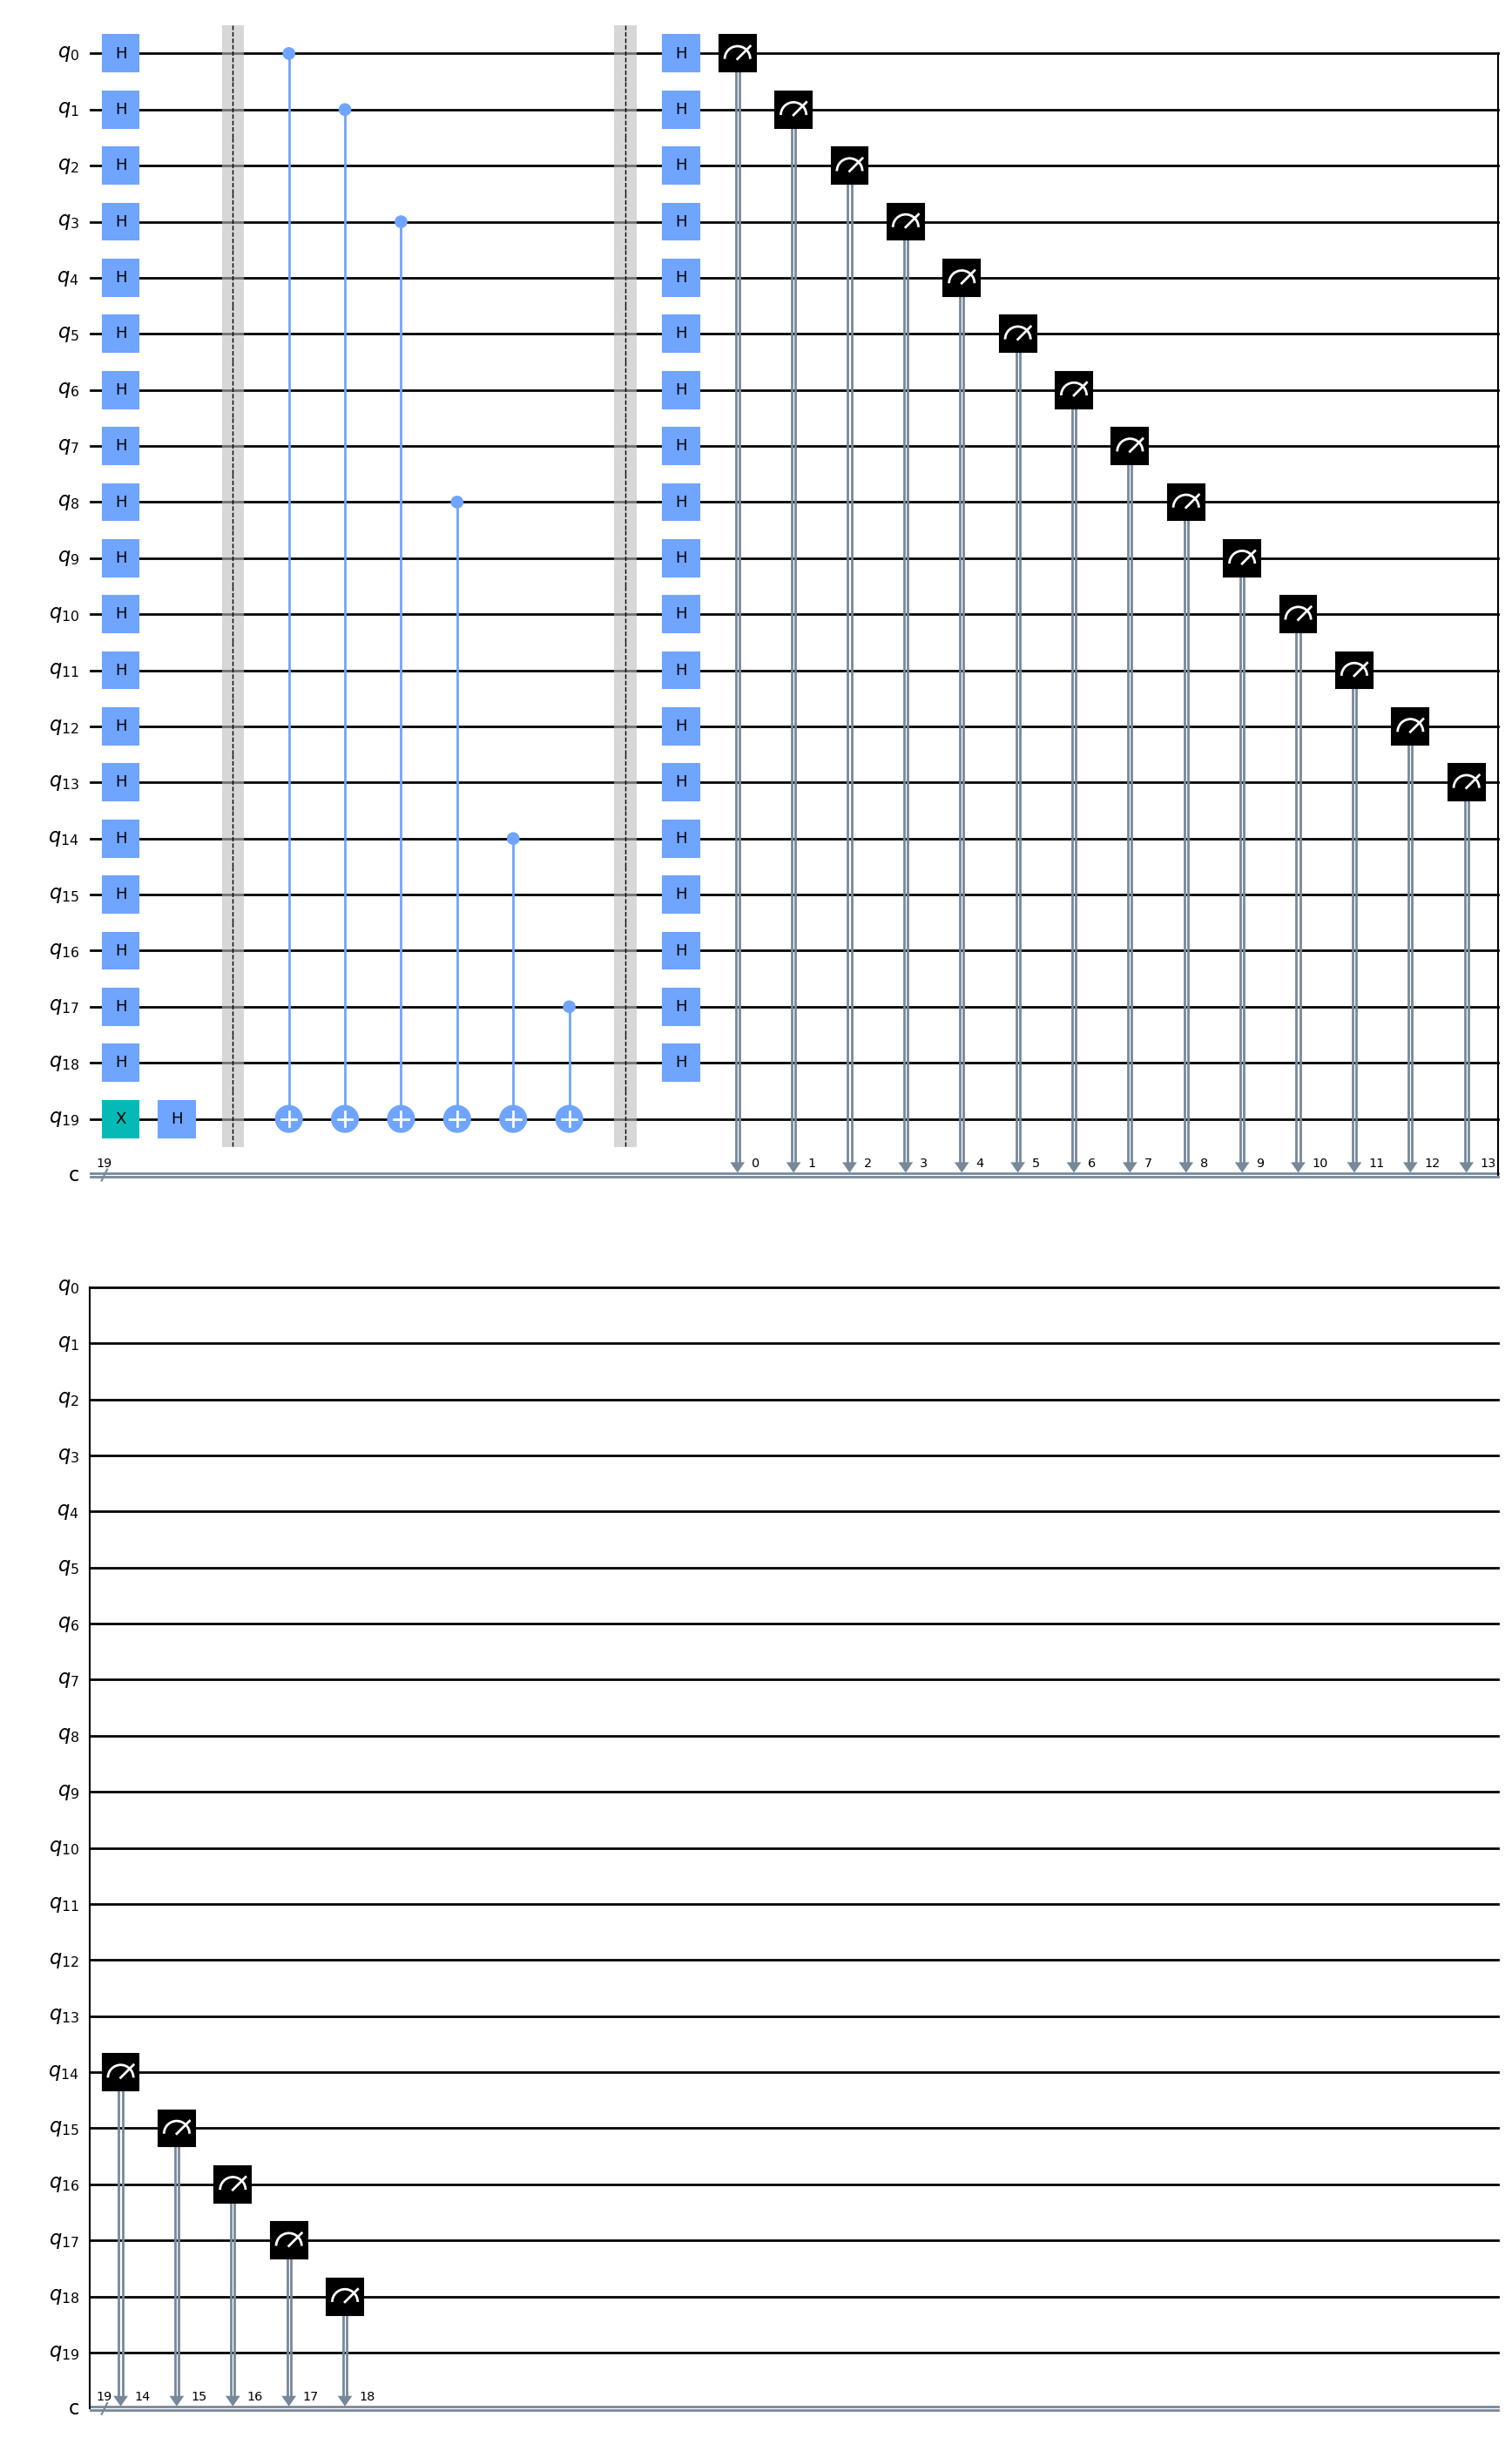

In [4]:
circuit.draw(output='mpl')

In [5]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend= simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'0100100000100001011': 1}
